# Membership Inference Black Box Attack Examples

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/privML/privacy-evaluator/blob/main/notebooks/membership_inference_black_box_attack.ipynb"><img src="https://raw.githubusercontent.com/privML/privacy-evaluator/team1sprint4/notebooks/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/privML/privacy-evaluator/blob/main/notebooks/membership_inference_black_box_attack.ipynb"><img src="https://raw.githubusercontent.com/privML/privacy-evaluator/main/notebooks/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>




## Overview

In this notebook, we want to show you how to use the `privacy-evaluator` tool to perform the Membership Inference Attacks Black Box Attack on both, a provided PyTorch and a provided Tensorflow model.

## Setup

First, you should set the notebook's runtime to use a GPU (e.g. if Colab is used go to ***Runtime > Change runtime type > Hardware accelerator***). Now we can install the `privacy-evaluator` package and import all needed modules.

In [8]:
!pip3 install git+https://github.com/privML/privacy-evaluator@team1sprint4

  Cloning https://github.com/privML/privacy-evaluator (to revision team1sprint4) to /tmp/pip-req-build-fn0otpvs
  Running command git clone -q https://github.com/privML/privacy-evaluator /tmp/pip-req-build-fn0otpvs
  Running command git checkout -b team1sprint4 --track origin/team1sprint4
  Switched to a new branch 'team1sprint4'
  Branch 'team1sprint4' set up to track remote branch 'team1sprint4' from 'origin'.
  Created wheel for privacy-evaluator: filename=privacy_evaluator-0.1-cp37-none-any.whl size=112447660 sha256=25b02e88d677acb2ab292a86f2e31b7432e95f19832167a04d2f82c39a342ad2
  Stored in directory: /tmp/pip-ephem-wheel-cache-vwrsvw9w/wheels/69/13/a0/092a33dd139764bcce399f23cf92c195049da93631adb751c7
Successfully built privacy-evaluator


In [9]:
import tensorflow as tf
import torch
import numpy as np

import tensorflow.python.ops.numpy_ops.np_config as np_config
np_config.enable_numpy_behavior()

import privacy_evaluator.models.torch.dcti.dcti as torch_dcti
import privacy_evaluator.models.tf.dcti.dcti as tf_dcti 

from privacy_evaluator.datasets.tf.cifar10 import TFCIFAR10
from privacy_evaluator.datasets.torch.cifar10 import TorchCIFAR10

from privacy_evaluator.classifiers.classifier import Classifier

from privacy_evaluator.attacks.membership_inference.black_box import MembershipInferenceBlackBoxAttack
from privacy_evaluator.attacks.membership_inference import MembershipInferenceAttackAnalysis

from privacy_evaluator.metrics.privacy_risk_score import * 
from privacy_evaluator.output.user_output_privacy_score import UserOutputPrivacyScore

from privacy_evaluator.attacks.membership_inference import MembershipInferenceAttackAnalysis

from privacy_evaluator.attacks.membership_inference.data_structures.attack_input_data import AttackInputData
from privacy_evaluator.attacks.membership_inference.data_structures.slicing import Slicing

## Conduct Membership Inference Black Box Attacks

Now we can start with conducting the Membership Inference Black Box Attacks. Therefore, we prepared two instances of the attack: one attacking a PyTorch model and attacking a TensorFlow model. For both attacks, we implemented a simple neural network trained on the CIFAR-10 dataset. For details about the provided network have a look at the following paper: https://www.scitepress.org/Papers/2018/67520/67520.pdf).

### PyTorch

We start the evaluation of the PyTorch version of the model.

#### Prepare target model

Now, we need to initialize our pre-trained Lightweight Deep Convolutional Neural Network (short DCTI) as a generic `Classifier`. Therefore we need to specify the loss function used to train the model (in our case the `torch.nn.CrossEntropyLoss`), the number of classes and the input shape of our CIFAR-10 dataset.

In [10]:
# Initalize PyTorch model as a Classifier
target_model = Classifier(
    torch_dcti.load_dcti(), # PyTorch DCTI 
    loss=torch.nn.CrossEntropyLoss(reduction="none"), # Loss function of the PyTorch model
    nb_classes=TorchCIFAR10.N_CLASSES, # Number of classes of the CIFAR10 dataset
    input_shape=TorchCIFAR10.INPUT_SHAPE # Input shape of the CIFAR10 dataset
)

#### Load CIFAR10 Dataset

Before we can start to conduct the membership inference attacks, we need to load the dataset. The CIFAR10 dataset needs to be preprocessed in a specific manner to work for the PyTorch model.

In [11]:
# Load CIFAR10 dataset as numpy array
x_train, y_train, x_test, y_test = TorchCIFAR10.numpy()

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


#### Perform Membership Inference Black Box Attack

We want to attack our target model with the Membership Inference  Black Box Attack. Thus, we initialize the attack with the target model and a dataset used to fit the attack model. The dataset consists of two different sets. The first contains the data (`x_train`) and its corresponding labels (`y_train`) which were used to train the target model. The second contains the data (`x_test`) and its corresponding labels (`y_test`) which were not part of the training process of the target model. After the initialization, we first need to fit the attack model before we can attack the target model. To attack certain data points, we simply input them into the `attack()` method. The result of the attack is an array holding the inferred membership status, 1 indicates a member and 0 indicates non-member.

In [12]:
attack = MembershipInferenceBlackBoxAttack(
    target_model, 
    x_train[:100], 
    y_train[:100], 
    x_test[:100], 
    y_test[:100]
)

attack.fit()
attack.attack(x_train[:100], y_train[:100])

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

#### Get machine-readable attack statistics

Besides the inferred membership status, we can create more general statistics. To do so, we generate an attack output by providing again the data points which should be attacked and the correct inferred membership labels (in this case all attacked data points are part of the training dataset and thus for all of them a membership should be predicted by the attack model). As result, we get the accuracy, the train-to-test accuracy gap and the train-to-test ratio for the target model and the accuracy for the attack model.

In [13]:
output = attack.attack_output(
    x_train[:100], 
    y_train[:100], 
    np.ones((100,))
)

output.to_json()

'{"target_model_train_accuracy": 0.96, "target_model_test_accuracy": 0.87, "target_model_train_to_test_accuracy_gap": 0.08999999999999997, "target_model_train_to_test_accuracy_ratio": 1.103448275862069, "attack_model_accuracy": 0.74}'

#### Explanation of the outcome:

Attack Model Accuracy:
The attack model accuracy specifies how well the membership attack model performs in predicting if a given data point was used for training the target model. Since we have a two-class classification problem that the attack model solves (member or non-member), the lowest possible accuracy is 50% (random guessing for each sample). The best accuracy is at 100% if the model predicts every data point is sees right as member or non-member.

Train-Test-Gap (difference):
If your model has a train-test-gap larger than 5%, this could be a sign that your model overfits. Overfitting can be beneficial for successful membership inference attacks [1]. Therefore, you might want to reduce it by introducing regularization methods in your training, or using specific privacy methods [2,3], such as Differential Privacy [4].

(For References, please see last box)

#### Perpare attack analysis

Next, we prepare our attack analysis. To initialize our attack analysis we define the Membership Inference Attack method we want to perform (in this case we use the `MembershipInferenceBlackBoxAttack`) and the Attack Input Data. The Attack Input Data consists of two different sets. The first contains the data (`x_train`) and its corresponding labels (`y_train`) which were used to train the target model. The second contains the data (`x_test`) and its corresponding labels (`y_test`) which were not part of the training process of the target model.

In [14]:
attack_analysis = MembershipInferenceAttackAnalysis(
    MembershipInferenceBlackBoxAttack, 
    AttackInputData(
        x_train[:100], 
        y_train[:100], 
        x_test[:100], 
        y_test[:100]
    )
)

#### Define the slicing

Now we can define the slicing for our analysis. The slicing defines how the data will be sliced. Each slice will then be analysed separately. 

In [15]:
slicing = Slicing(
    entire_dataset=True, 
    by_class=True, 
    by_classification_correctness=True
)

#### Perform Membership Inference Attack Analysis

Finally, we can perform our Membership Inference Attack Analysis. Therefore, we input the target model, the data that should be analysed, the membership labels (i.e. the labels which correctly describe if a data point is a member of the training dataset or not) and the splicing specification into the `analyse()` method. As a result, we get for each slice the indices of the corresponding data points, a human-readable description of the slice and the advantage score of the Membership Inference Attack (for more details about the advantage score, please read the following paper: https://arxiv.org/abs/1709.01604).

In [16]:
result = attack_analysis.analyse(
    target_model, 
    np.concatenate((x_train[:100], x_test[:100])), 
    np.concatenate((y_train[:100], y_test[:100])), 
    np.concatenate((np.ones(len(x_train[:100])), np.zeros(len(x_test[:100])))), 
    slicing
)

print("\n".join((str(r) for r in result)))

MembershipInferenceAttackAnalysisSliceResult(
  Slice(
    indices: [  0   1 ... 198 199]
    desc: Entire dataset
  )
  advantage: 0.0700
)
MembershipInferenceAttackAnalysisSliceResult(
  Slice(
    indices: [  0   1 ... 198 199]
    desc: Correctly classified
  )
  advantage: 0.0948
)
MembershipInferenceAttackAnalysisSliceResult(
  Slice(
    indices: [ 21  39 ... 186 187]
    desc: Incorrectly classified
  )
  advantage: 0.1923
)
MembershipInferenceAttackAnalysisSliceResult(
  Slice(
    indices: [ 29  30 ... 197 198]
    desc: Class=0
  )
  advantage: 0.0000
)
MembershipInferenceAttackAnalysisSliceResult(
  Slice(
    indices: [  4   5 ... 181 182]
    desc: Class=1
  )
  advantage: 0.0000
)
MembershipInferenceAttackAnalysisSliceResult(
  Slice(
    indices: [  6  13 ... 184 186]
    desc: Class=2
  )
  advantage: 0.1250
)
MembershipInferenceAttackAnalysisSliceResult(
  Slice(
    indices: [  9  17 ... 178 191]
    desc: Class=3
  )
  advantage: 0.2462
)
MembershipInferenceAttackAn

#### Explanation of the outcome:
##### Attacker Advantage:
The attacker advantageis a score that relies on comparing the model output on member and non-member data points. The model outputs are probability values over all classes, and they are often different on member and non-member data points. Usually, the model is more confident on member data points, because it has seen them during training. When trying to find a threshold value to tell apart member and non-member samples by their different model outputs, the attacker has interest in finding the best ratio between false positives “fpr” (non-members that are classified as members) and true positives “tpr” (members that are correctly identifies as members). 

This best ratio is calculated as the max(tpr-fpr) over all threshold values and represents the attacker advantage. 

##### Slicing: Incorrectly classified:
It is normal that the attacker is more successful to deduce membership on incorrectly classified samples than on correctly classified ones. This results from the fact, that model predictions are often better on training than on test data points, whereby your attack model might learn to predict incorrectly classified samples as non-members. If your model overfits the training data, this assumption might hold true often enough to make the attack seem more successful on this slice. If you wish to reduce that, pay attention to reducing your model’s overfitting.

##### Slicing: Specific classes more vulnerable: 
It seems that the membership inference attack is more successful on your class X than on the other classes. Research has shown that the class distribution (and also the distribution of data points within one class) are factors that influence the vulnerability of a class for membership inference attacks [5].

Also, small classes (belonging to minority groups) can be more prone to membership inference attacks [6]. One reason for this could be, that there is less data for that class, and therefore, the model overfits within this class. It might make sense to look into the vulnerable classes of your model again, and maybe add more data to them, use private synthetic data, or introduce privacy methods like Differential Privacy [6]. Attention, the use of Differential Privacy could have a negative influence on the performance of your model for the minority classes.


(For References, please see last box)

#### Compute privacy risk score

As a next step, we want to compute the privacy risk scores. To do so, we input the target model and the data points which should be evaluated to the respective function. The given data points are separated into a train and tests set. The train set contains of the data (`x_train`) and its corresponding labels (`y_train`) which were used to train the target model. The test set contains the data (`x_test`) and its corresponding labels (`y_test`) which were not part of the training process of the target model. As a result, we get privacy risk scores for each data point, separated into train and test scores. The resulting values indicate the probability of a data point being a member or not.

In [17]:
# Compute membership privacy risk score for the PyTorch model
(
    train_privacy_risk_score, 
    test_privacy_risk_score
) = compute_privacy_risk_score(
    target_model, 
    x_train[:100], 
    y_train[:100], 
    x_test[:100], 
    y_test[:100]
)

#### Get human-readable privacy risk score statistics

Besides the privacy risk scores, we can create more human-readable statistics. Therefore we generate an output by providing the privacy risk scores and the true labels of the data points for which we computed the privacy risk scores. This output can then be visualized in two separate ways.

In [18]:
# Create user output and plot histogram for train dataset
output = UserOutputPrivacyScore(
    np.argmax(y_train[:100], axis=1),
    train_privacy_risk_score, 
)

The first way to visualise the privacy risk scores is as a histogram. The histogram shows the distribution of the k-top data points with the highest privacy risk scores per class.

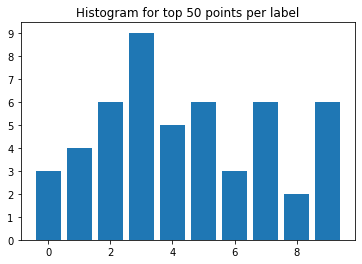

In [19]:
# Plot absolut values 
labels, count = output.histogram_top_k(range(10), 50)

As a second option, you can visualise the privacy risk scores again as a histogram of the distribution of the k-top data points with the highest privacy risk scores per class, but this time the values are relative to the size of respective classe

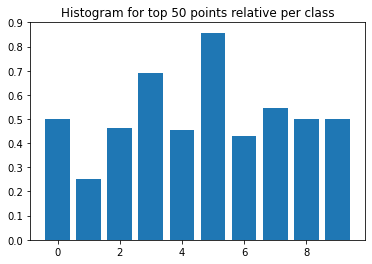

In [20]:
# Plot relative values 
labels, count = output.histogram_top_k_relative(range(10), 50)

#### Explanation of the outcome:

##### Vulnerability of individual data points:
The training data points that exhibit an increased membership privacy risk might differ from their classes mean samples (outliers) [7]. You could check them again, see if they have the correct label, or if they exhibit any non-standard properties for the class. If so, correct them. It was also shown that points with an high influence on the decision boundary are more vulnerable to membership inference attacks [5]. Therefore, these points might be important. If you want to protect them, you might add several similar training samples as they are to the class. 


(For References, please see last box)

### TensorFlow

Now we do the same with the TensorFlow model.

#### Prepare target model

Now, we need to initialize our pre-trained Lightweight Deep Convolutional Neural Network (short DCTI) as a generic `Classifier`. Therefore we need to specify the loss function used to train the model (in our case the `tf.keras.losses.CategoricalCrossentropy`), the number of classes and the input shape of our CIFAR-10 dataset.

In [21]:
# Initalize TensorFlow target model
target_model = Classifier(
    tf_dcti.load_dcti(), # TensorFlow DCTI
    loss=tf.keras.losses.CategoricalCrossentropy(), # Loss function of the TensorFlow target model
    nb_classes=TFCIFAR10.N_CLASSES, # Number of classes of the CIFAR10 dataset
    input_shape=TFCIFAR10.INPUT_SHAPE # Input shape of the CIFAR10 dataset
)

#### Load CIFAR10 Dataset

Again, before we can start to conduct the membership inference attacks, we need to load the dataset. The CIFAR10 dataset needs to be preprocessed in a specific manner to work for the TensorFlow model.

In [22]:
# Load CIFAR10 dataset as numpy array
x_train, y_train, x_test, y_test = TFCIFAR10.numpy()

170500096/170498071 [==============================] - 4s 0us/step


#### Perform Membership Inference Black Box Attack

First, we want to attack our target model with the Membership Inference  Black Box Attack. Thus, we initialize the attack with the target model and a dataset used to fit the attack model. The dataset consists of two different sets. The first contains the data (`x_train`) and its corresponding labels (`y_train`) which were used to train the target model. The second contains the data (`x_test`) and its corresponding labels (`y_test`) which were not part of the training process of the target model. After the initialization, we first need to fit the attack model before we can attack the target model. To attack certain data points, we simply input them into the `attack()` method. The result of the attack is an array holding the inferred membership status, 1 indicates a member and 0 indicates non-member.

In [23]:
attack = MembershipInferenceBlackBoxAttack(
    target_model, 
    x_train[:100], 
    y_train[:100], 
    x_test[:100], 
    y_test[:100]
)

attack.fit()
attack.attack(x_train[:100], y_train[:100])

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1])

#### Get machine-readable attack statistics

Besides the inferred membership status, we can create more general statistics. To do so, we generate an attack output by providing again the data points which should be attacked and the correct inferred membership labels (in this case all attacked data points are part of the training dataset and thus for all of them a membership should be predicted by the attack model). As result, we get the accuracy, the train-to-test accuracy gap and the train-to-test ratio for the target model and the accuracy for the attack model.

In [24]:
output = attack.attack_output(
    x_train[:100], 
    y_train[:100], 
    np.ones((100,))
)

output.to_json()

'{"target_model_train_accuracy": 0.99, "target_model_test_accuracy": 0.91, "target_model_train_to_test_accuracy_gap": 0.07999999999999996, "target_model_train_to_test_accuracy_ratio": 1.0879120879120878, "attack_model_accuracy": 0.75}'

#### Explanation of the outcome:

Attack Model Accuracy:
The attack model accuracy specifies how well the membership attack model performs in predicting if a given data point was used for training the target model. Since we have a two-class classification problem that the attack model solves (member or non-member), the lowest possible accuracy is 50% (random guessing for each sample). The best accuracy is at 100% if the model predicts every data point is sees right as member or non-member.

Train-Test-Gap (difference):
If your model has a train-test-gap larger than 5%, this could be a sign that your model overfits. Overfitting can be beneficial for successful membership inference attacks [1]. Therefore, you might want to reduce it by introducing regularization methods in your training, or using specific privacy methods [2,3], such as Differential Privacy [4].

(For References, please see last box)


#### Perpare attack analysis

Next, we prepare our attack analysis. To initialize our attack analysis we define the Membership Inference Attack method we want to perform (in this case we use the `MembershipInferenceBlackBoxAttack`) and the Attack Input Data. The Attack Input Data consists of two different sets. The first contains the data (`x_train`) and its corresponding labels (`y_train`) which were used to train the target model. The second contains the data (`x_test`) and its corresponding labels (`y_test`) which were not part of the training process of the target model.

In [25]:
analysis = MembershipInferenceAttackAnalysis(
    MembershipInferenceBlackBoxAttack, 
    AttackInputData(
        x_train[:100], 
        y_train[:100], 
        x_test[:100], 
        y_test[:100]
    )
)

#### Define the slicing

Now we can define the slicing for our analysis. The slicing defines how the data will be sliced. Each slice will then be analysed separately. 

In [26]:
slicing = Slicing(
    entire_dataset=True, 
    by_class=True, 
    by_classification_correctness=True
)

#### Perform Membership Inference Attack Analysis

Finally, we can perform our Membership Inference Attack Analysis. Therefore, we input the target model, the data that should be analysed, the membership labels (i.e. the labels which correctly describe if a data point is a member of the training dataset or not) and the splicing specification into the `analyse()` method. As a result, we get for each slice the indices of the corresponding data points, a human-readable description of the slice and the advantage score of the Membership Inference Attack (for more details about the advantage score, please read the following paper: https://arxiv.org/abs/1709.01604).

In [27]:
result = analysis.analyse(
    target_model, 
    np.concatenate((x_train[:100], x_test[:100])), 
    np.concatenate((y_train[:100], y_test[:100])), 
    np.concatenate((np.ones(len(x_train[:100])), np.zeros(len(x_test[:100])))), 
    slicing
)

print("\n".join((str(r) for r in result)))

MembershipInferenceAttackAnalysisSliceResult(
  Slice(
    indices: [  0   1 ... 198 199]
    desc: Entire dataset
  )
  advantage: 0.0900
)
MembershipInferenceAttackAnalysisSliceResult(
  Slice(
    indices: [  0   1 ... 198 199]
    desc: Correctly classified
  )
  advantage: 0.0004
)
MembershipInferenceAttackAnalysisSliceResult(
  Slice(
    indices: [ 84 132 135 137 147 152 157 158 161 178]
    desc: Incorrectly classified
  )
  advantage: 0.3333
)
MembershipInferenceAttackAnalysisSliceResult(
  Slice(
    indices: [ 29  30 ... 197 198]
    desc: Class=0
  )
  advantage: 0.1000
)
MembershipInferenceAttackAnalysisSliceResult(
  Slice(
    indices: [  4   5 ... 181 182]
    desc: Class=1
  )
  advantage: 0.0000
)
MembershipInferenceAttackAnalysisSliceResult(
  Slice(
    indices: [  6  13 ... 184 186]
    desc: Class=2
  )
  advantage: 0.0769
)
MembershipInferenceAttackAnalysisSliceResult(
  Slice(
    indices: [  9  17 ... 178 191]
    desc: Class=3
  )
  advantage: 0.2308
)
Members

#### Explanation of the outcome:
##### Attacker Advantage:
The attacker advantageis a score that relies on comparing the model output on member and non-member data points. The model outputs are probability values over all classes, and they are often different on member and non-member data points. Usually, the model is more confident on member data points, because it has seen them during training. When trying to find a threshold value to tell apart member and non-member samples by their different model outputs, the attacker has interest in finding the best ratio between false positives “fpr” (non-members that are classified as members) and true positives “tpr” (members that are correctly identifies as members). 

This best ratio is calculated as the max(tpr-fpr) over all threshold values and represents the attacker advantage. 

##### Slicing: Incorrectly classified:
It is normal that the attacker is more successful to deduce membership on incorrectly classified samples than on correctly classified ones. This results from the fact, that model predictions are often better on training than on test data points, whereby your attack model might learn to predict incorrectly classified samples as non-members. If your model overfits the training data, this assumption might hold true often enough to make the attack seem more successful on this slice. If you wish to reduce that, pay attention to reducing your model’s overfitting.

##### Slicing: Specific classes more vulnerable: 
It seems that the membership inference attack is more successful on your class X than on the other classes. Research has shown that the class distribution (and also the distribution of data points within one class) are factors that influence the vulnerability of a class for membership inference attacks [5].

Also, small classes (belonging to minority groups) can be more prone to membership inference attacks [6]. One reason for this could be, that there is less data for that class, and therefore, the model overfits within this class. It might make sense to look into the vulnerable classes of your model again, and maybe add more data to them, use private synthetic data, or introduce privacy methods like Differential Privacy [6]. Attention, the use of Differential Privacy could have a negative influence on the performance of your model for the minority classes.


(For References, please see last box)

#### Compute privacy risk score

As a next step, we want to compute the privacy risk scores. To do so, we input the target model and the data points which should be evaluated to the respective function. The given data points are separated into a train and tests set. The train set contains of the data (`x_train`) and its corresponding labels (`y_train`) which were used to train the target model. The test set contains the data (`x_test`) and its corresponding labels (`y_test`) which were not part of the training process of the target model. As a result, we get privacy risk scores for each data point, separated into train and test scores. The resulting values indicate the probability of a data point being a member or not.

In [28]:
# Compute privacy risk score for the TensorFlow target model
(
    train_privacy_risk_score, 
    test_privacy_risk_score
) = compute_privacy_risk_score(
    target_model, 
    x_train[:100], 
    y_train[:100], 
    x_test[:100], 
    y_test[:100]
)

#### Get human-readable privacy risk score statistics

Besides the privacy risk scores, we can create more human-readable statistics. Therefore we generate an output by providing the privacy risk scores and the true labels of the data points for which we computed the privacy risk scores. This output can then be visualized in two separate ways.

In [29]:
# Create user output and plot histogram for train dataset
output = UserOutputPrivacyScore(
    np.argmax(y_train[:100], axis=1), 
    train_privacy_risk_score, 
)

The first way to visualise the privacy risk scores is as a histogram. The histogram shows the distribution of the k-top data points with the highest privacy risk scores per class.

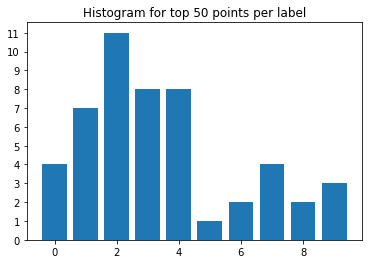

In [30]:
# Plot absolut values 
labels, count = output.histogram_top_k(range(10), 50)

As a second option, you can visualise the privacy risk scores again as a histogram of the distribution of the k-top data points with the highest privacy risk scores per class, but this time the values are relative to the size of respective classe

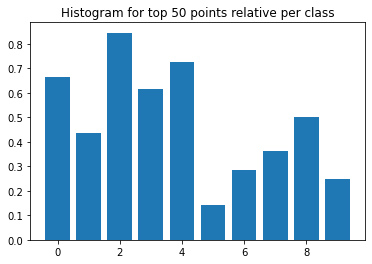

In [31]:
# Plot relative values 
labels, count = output.histogram_top_k_relative(range(10), 50)

#### Explanation of the outcome:

##### Vulnerability of individual data points:
The training data points that exhibit an increased membership privacy risk might differ from their classes mean samples (outliers) [7]. You could check them again, see if they have the correct label, or if they exhibit any non-standard properties for the class. If so, correct them. It was also shown that points with an high influence on the decision boundary are more vulnerable to membership inference attacks [5]. Therefore, these points might be important. If you want to protect them, you might add several similar training samples as they are to the class. 


(For References, please see last box)

[1]S. Yeom, I. Giacomelli, M. Fredrikson, and S. Jha. \Privacy Risk in Machine Learning: Analyzing the Connection to Overfitting". In: 2018 IEEE 31st Computer Security Foundations Symposium (CSF). July 2018, pp. 268{282. doi:10.1109/CSF.2018.00027.

[2] Reza Shokri, Marco Stronati, Congzheng Song, and Vitaly Shmatikov. 2017. Mem-bership Inference Attacks Against Machine Learning Models. In2017 IEEE Sym-posium on Security and Privacy (SP). 3–18.

[3] Milad Nasr, Reza Shokri, and Amir Houmansadr. 2018. Machine Learning withMembership Privacy Using Adversarial Regularization. InProceedings of the 2018ACM SIGSAC Conference on Computer and Communications Security(Toronto,Canada)(CCS ’18). Association for Computing Machinery, New York, NY, USA,634–64

[4] Cynthia Dwork. 2006.  Differential Privacy. InAutomata, Languages and Pro-gramming, Michele Bugliesi, Bart Preneel, Vladimiro Sassone, and Ingo Wegener(Eds.). Springer Berlin Heidelberg, Berlin, Heidelberg

[5] Stacey Truex, Ling Liu, Mehmet Emre Gursoy, Lei Yu, and Wenqi Wei. 2019.Demystifying Membership Inference Attacks in Machine Learning as a Service.IEEE Transactions on Services Computing(2019)

[6] Suriyakumar, Vinith M., Nicolas Papernot, Anna Goldenberg, and Marzyeh Ghassemi. "Chasing Your Long Tails: Differentially Private Prediction in Health Care Settings." In Proceedings of the 2021 ACM Conference on Fairness, Accountability, and Transparency, pp. 723-734. 2021.

[7] Yunhui Long, Vincent Bindschaedler, Lei Wang, Diyue Bu, Xiaofeng Wang, HaixuTang, Carl A. Gunter, and Kai Chen. 2018.   Understanding Membership In-ferences on Well-Generalized Learning Models.CoRRabs/1802.04889 (2018).arXiv:1802.04889  http://arxiv.org/abs/1802.0
